## 📦 Import Required Libraries  
Importing all the necessary libraries for data processing, visualization, natural language processing (NLP), and model building.


In [1]:
#Importing all the libraries to be used
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

## 📥 Load Dataset and Preview Shape  
Loading the SMS Spam Collection dataset and selecting only the relevant columns (`v1` as label and `v2` as message text). Displaying the shape of the dataset.


In [2]:

df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.shape


(5572, 2)

## 📊 Visualize Class Distribution  
Plotting the count of each class (ham vs spam) to visualize data imbalance and distribution of target labels.

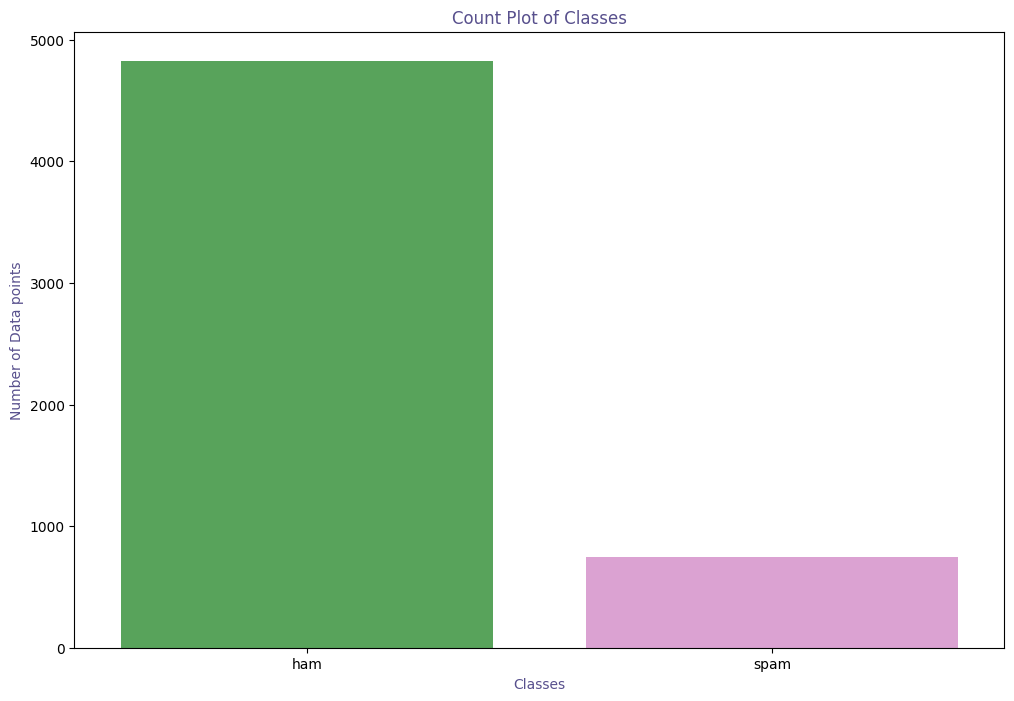

In [3]:
#Palette
cols= ["#4CAF50", "#E598D8"] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["v1"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")
plt.show()

## ⚠️ Precision Over Accuracy  
Since the dataset is imbalanced, we prioritize **precision** over accuracy during evaluation, as accuracy can be misleading in such scenarios.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## 🔍 Sample Records  
Previewing 5 random samples from the dataset to get a better understanding of the data.


In [5]:
df.sample(5)

,v1,v2
4978,ham,Spending new years with my brother and his fam...
3997,spam,We tried to call you re your reply to our sms ...
2094,spam,PRIVATE! Your 2004 Account Statement for 07742...
1567,ham,"whatever, im pretty pissed off."
797,ham,\Petey boy whereare you me and all your friend...


## 🏷️ Rename Columns  
Renaming the columns for clarity: `v1` becomes `target`, and `v2` becomes `text`.


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 🔢 Encode Target Labels  
Encoding the categorical labels into numeric format: `ham` becomes 0 and `spam` becomes 1.


In [7]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 📋 Check and Remove Duplicates  
Identifying and removing duplicate rows to ensure data quality and avoid data leakage.


In [8]:
df.duplicated().sum()

np.int64(403)

In [9]:
df.drop_duplicates(inplace=True)

## 🧠 Text Vectorization  
Converting the message text into a bag-of-words model using CountVectorizer, which turns text into numerical vectors.


In [10]:
# Tokenize & Vectorize
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['target']


## 🔀 Split Dataset  
Splitting the data into training and testing sets with an 80-20 ratio to evaluate model generalization.


In [11]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🌲 Train Random Forest Model  
Training a Random Forest Classifier with 100 estimators on the training data to predict spam messages.


In [12]:
#  Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 📈 Evaluate Model Performance  
Evaluating model predictions using accuracy, confusion matrix, and classification report. Visualizing the confusion matrix with a heatmap.


In [13]:
#  Evaluate Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9748549323017408

Confusion Matrix:
 [[888   1]
 [ 25 120]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.83      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034



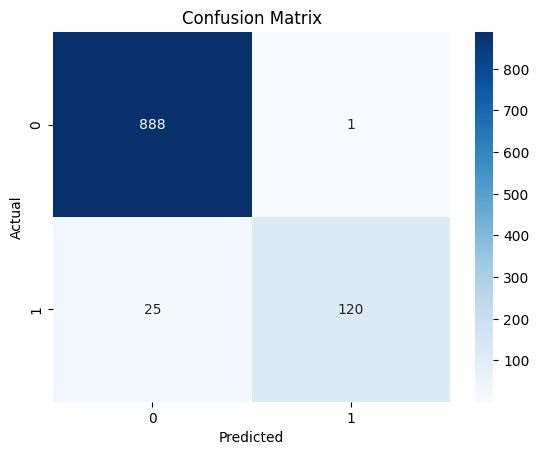

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 📢 Most Frequent Words in Spam Messages

To better understand spam message patterns, we analyze the most commonly occurring words. This helps identify repeated marketing terms or scam phrases used in spam messages.

Steps:
- Filter spam messages only
- Clean and tokenize the text (lowercase, remove punctuation, remove stopwords, stemming)
- Count word frequency
- Visualize the top 20 frequent spam words using a horizontal bar chart


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


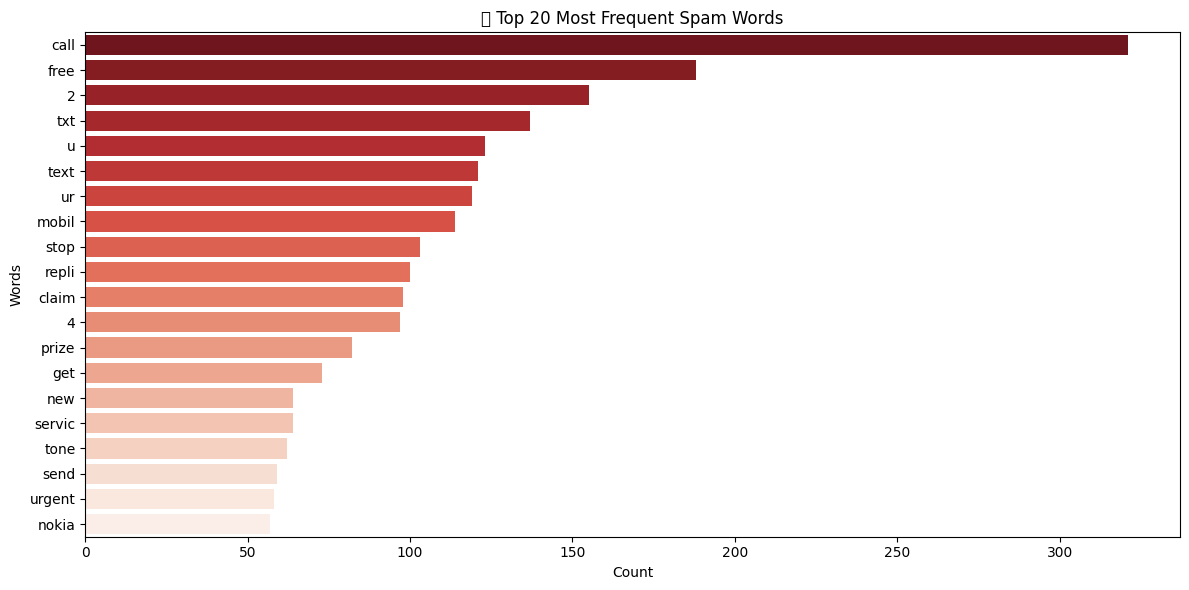

In [17]:

import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Step 1: Filter only spam messages
spam_messages = df[df['target'] == 1]['text']

# Step 2: Clean and tokenize
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return tokens

all_words = []
for message in spam_messages:
    all_words.extend(clean_text(message))

# Step 3: Count and visualize top 20 words
from collections import Counter
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plot
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), palette="Reds_r")
plt.title("🔠 Top 20 Most Frequent Spam Words")
plt.xlabel("Count")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


## 📊 ROC Curve and AUC Score

The ROC Curve (Receiver Operating Characteristic) visualizes the trade-off between True Positive Rate and False Positive Rate at different thresholds. It helps us assess classifier performance beyond simple accuracy.

- **AUC (Area Under Curve)** represents the likelihood that the model ranks a random positive example higher than a random negative one.
- AUC closer to 1 = Excellent model; AUC = 0.5 = No better than random.

This plot confirms the classifier’s effectiveness in separating ham and spam messages.


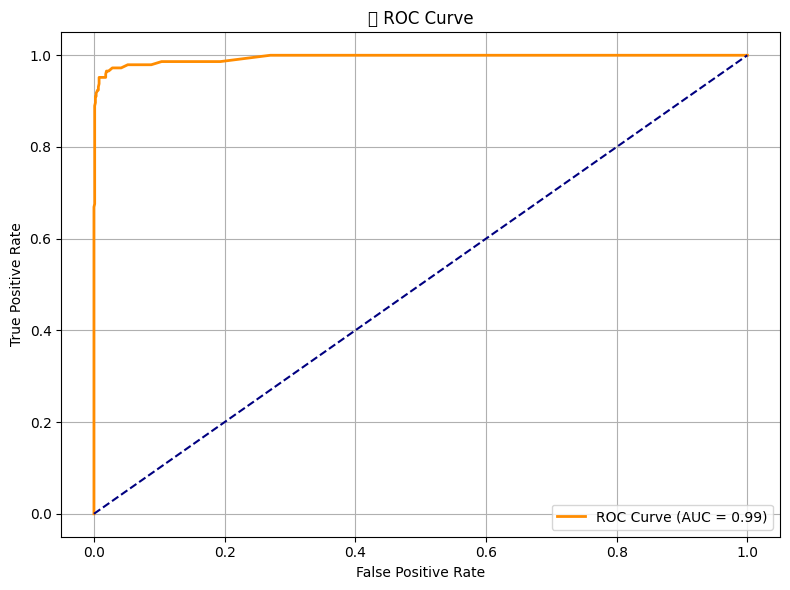

In [18]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
